<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
## <font color='navy'> SIMULACIÓN DE PROCESOS FINANCIEROS   

**Nombres:** 
José Antonio Contreras Peña y Jesús Sebastian Gonzalez Ortiz 

**Fecha:** 14 de octubre del 2021.

**Expediente** : 721860 y 721621.

**Profesor:** Oscar David Jaramillo Zuluaga.

**Enlace Github:** https://github.com/Jancope/ProyectoModulo1

## Definición de Proyecto  Clase: 12

# Tema: *Simulación de ventas de Rappi*

### Objetivos

   ### 1.1 Objetivo general
   - Analizar y determinar la disposición de pago de clientes por envío.
    
   ### 1.2 Objetivos específicos
   - Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos.
   - Encontrar las categorías donde la gente gasta más en envíos.
   - Encontrar rangos de gasto promedio por pedido.
   - 

### Definición del problema

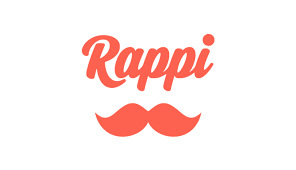

Las empresas que ofrecen el servicio a domicilio han ido en auge tomando cada vez más importancia dentro de la sociedad, desde favores y encargos hasta el servicio a domicilio de alimentos, Rappi es uno de los grandes exponentes de esta industria y ha asentado bases dentro de la sociedad que hasta el día de hoy su aplicación se ha vuelto indispensable para muchas personas. 

Uno de los grandes problemas de pueden afrontar dichas empresas son sus tarifas de entrega que, además del precio de la compra o favor que se encarga, es un costo extra que los clientes tienen muy presentes y pueden ser lo que define si un cliente hace el encargo o no.

Para la investigación se debe tener en cuenta que los datos recopilados son de Bogotá, Colombia y están enfocados en el servicio a domicilio de alimentos en este caso. Se sabe Rappi no es la única aplicación de servicios a domicilio en el mercado, es una de las principales, pero siempre que haya una mejor oferta o una menor tarifa de entrega por el mismo producto en otra aplicación, obviamente significaría que no usarán Rappi.

Para determinar las preferencias de cantidad de pagos por envío se tendrán en cuenta como variables el precio del pedido, costo del pedido, categoría del pedido y la relación precio-costo de envío que tienen los pedidos para tener unas simulaciones representativas del contexto.


### Nodos
   - Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos.
   - Encontrar las categorías donde la gente gasta más en envíos.
   - Encontrar rangos de gasto promedio por pedido.
   - 

### Variables
 - Tipo de comercio
 - Gasto de envío
 - Total Gastado
 - Porcentaje de gasto de envió de la compra

### Hipótesis y Supuestos:
 - La empresa gana mas dinero cuando se paga más de envió
 - Las personas están dispuestas a pagar más de envió si la compra es mas grande.

### Obtención de base de datos

https://www.kaggle.com/alexbonella/sales-simulation-at-rappi

In [29]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  
import matplotlib.pyplot as plt
import scipy.stats as st     
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import warnings
import statsmodels as sm 
import matplotlib 
from scipy.stats import loglaplace 
from scipy.stats.distributions import norm 
from sklearn.model_selection import GridSearchCV
from statistics import mode
from statistics import mean
import statistics


### Base de datos

In [2]:
data = pd.read_csv('Sales_simulation.csv')
data.head()

,Unnamed: 0,purchase_ID,Date at created,Category,Name,Purchase Price,Delivery Price,Total
0,0,1,21-10-2020 14:42:55.373979,Saludable · Desayunos,Distrito Gourmet,10700,3700,14400
1,1,2,21-10-2020 14:42:55.483563,Postres,Toledo Pastelería,53900,6800,60700
2,2,3,21-10-2020 14:42:55.739536,Postres · Helados,Mahé,7500,6000,13500
3,3,4,21-10-2020 14:42:55.945560,Hamburguesas · Saludable,Restaurant Inn,23000,6100,29100
4,4,5,21-10-2020 14:42:56.201561,Postres · Desayunos,Maria Luisa - Postres,9000,4300,13300


In [3]:
data = data.drop(["Unnamed: 0"], axis=1)
data = data.drop(["purchase_ID"], axis=1)
data = data.drop(["Date at created"], axis=1)
data = data.drop(["Name"], axis=1)
data.head()

,Category,Purchase Price,Delivery Price,Total
0,Saludable · Desayunos,10700,3700,14400
1,Postres,53900,6800,60700
2,Postres · Helados,7500,6000,13500
3,Hamburguesas · Saludable,23000,6100,29100
4,Postres · Desayunos,9000,4300,13300


Se eliminaron columnas de datos basura de la base de datos.

In [4]:
data["Porcentaje"] = (data["Delivery Price"] / data["Total"])*100
data

,Category,Purchase Price,Delivery Price,Total,Porcentaje
0,Saludable · Desayunos,10700,3700,14400,25.694444
1,Postres,53900,6800,60700,11.202636
2,Postres · Helados,7500,6000,13500,44.444444
3,Hamburguesas · Saludable,23000,6100,29100,20.962199
4,Postres · Desayunos,9000,4300,13300,32.330827
5,Pollo · China,24200,3500,27700,12.635379
6,Desayunos,24300,4400,28700,15.331010
7,Sushi · Asiática,45800,6400,52200,12.260536
8,Desayunos · Café,37900,4700,42600,11.032864
9,Postres · Desayunos,8900,6400,15300,41.830065


Filtramos las variables que se iban a requerir para este proyecto y además agregamos la variable de "Porcentaje" que representa el porcentaje de costo que tiene el envío sobre el total del pedido.

## Nodo 1
- Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos.

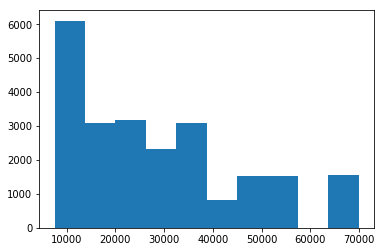

In [5]:
plt.hist(data["Purchase Price"], bins = 10)
plt.show()

In [6]:
media = mean(data["Purchase Price"])
minima = min(data["Purchase Price"])
maxima = max(data["Purchase Price"])

print("El promedio de precio de compras por pedido es de $", media)
print("La mínima compra afectuada fue de $", minima)
print("La máxima compra realizada fue de $", maxima)

El promedio de precio de compras por pedido es de $ 28588.240206629358
La mínima compra afectuada fue de $ 7500
La máxima compra realizada fue de $ 70000


Como se puede observar en el histograma la categoría que ronda los $10,000 pesos es la que tiene más pedidos efectuados, y a medida que el precio va subiendo cada vez hay menos pedidos.

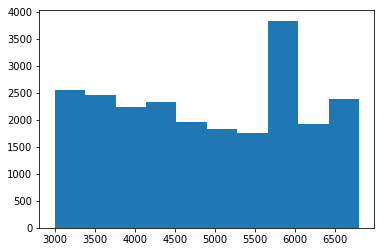

In [7]:
plt.hist(data["Delivery Price"], bins = 10)
plt.show()

In [8]:
media = mean(data["Delivery Price"])
minima = min(data["Delivery Price"])
maxima = max(data["Delivery Price"])

print("El promedio de precio de encargo por pedido es de $", media)
print("El mínima precio de encargo fue de $", minima)
print("El máximo precio de encargo fue de $", maxima)

El promedio de precio de encargo por pedido es de $ 4901.45071028842
El mínima precio de encargo fue de $ 3000
El máximo precio de encargo fue de $ 6800


El rango de costo de entrega a la que la gente esta dispuesta a pagar va desde los 3,000 pesos hasta los 6,800 pesos, mientras que el promedio del costo de entrega es de $4,900.

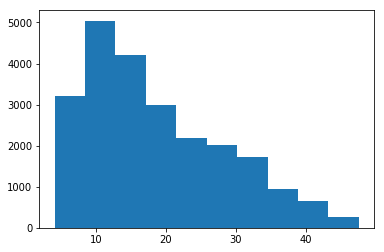

In [9]:
plt.hist(data["Porcentaje"], bins = 10)
plt.show()

In [30]:
media = mean(data["Porcentaje"])
minima = min(data["Porcentaje"])
maxima = max(data["Porcentaje"])
desvest=statistics.stdev(data["Porcentaje"])

print("El promedio de porcentaje de gasto por pedido es de", media,"%")
print("El mínimo porcentaje de compra fue", minima,"%")
print("El máximo porcentaje de compra fue", maxima,"%")
desvest

El promedio de porcentaje de gasto por pedido es de 18.59462350164813 %
El mínimo porcentaje de compra fue 4.10958904109589 %
El máximo porcentaje de compra fue 47.55244755244755 %


9.782888708193019

Se puede observar que la gente en promedio paga hasta un 18%-19% del precio total de su pedido como tarifa de entrega.

In [11]:
mode(data["Category"])

'Postres · Desayunos'

La categoría de la que más pedidos se hacen es la de Postres y Desayunos.

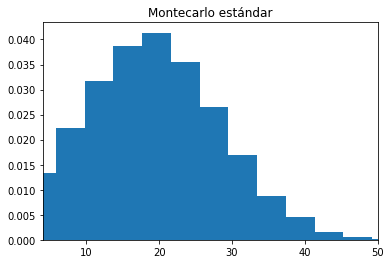

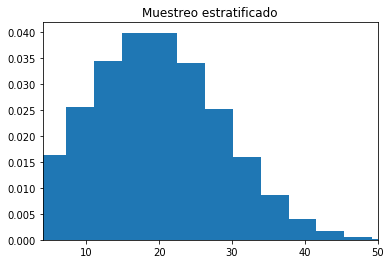

In [34]:
N = 20000
# (Método transformada inversa visto en clases pasadas) d.normal
mu = 18.59
sigma =9.78

# Método montecarlo estándar para distribución normal
montecarlo_standar = st.norm(mu, sigma).ppf(np.random.rand(N))
plt.hist(montecarlo_standar,20,density=True)
plt.title('Montecarlo estándar')
plt.xlim((4, 50))
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(N)
m_estratificado = st.norm(mu, sigma).ppf((U2 + np.arange(0, B)) / B)

plt.hist(m_estratificado,20,density=True)
plt.title('Muestreo estratificado')
plt.xlim((4, 50))
plt.show()